## THE SPARKS FOUNDATION
### GRADUATE ROTATIONAL INTERNSHIP PROGRAM GRIPMAR21
### DATA SCIENCE AND BUSINESS ANALYTICS


### Author: Abdullah Ficici

### Task 3 - Exploratory Data Analysis - Retail
- As a business manager, try to find out the weak areas where you can work to make more profit.
- What all business problems you can derive by exploring the data?

### Import the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Load the Data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.shape

(9994, 13)

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Check and Remove Duplicates

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(9977, 13)

#### Correlations

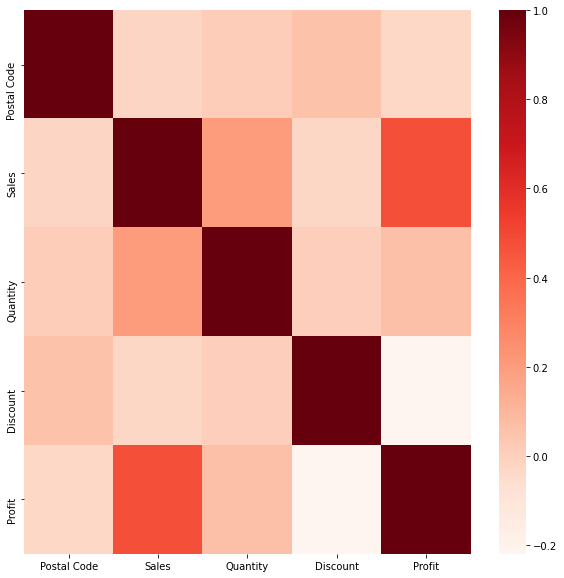

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = "Reds")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Pairplot

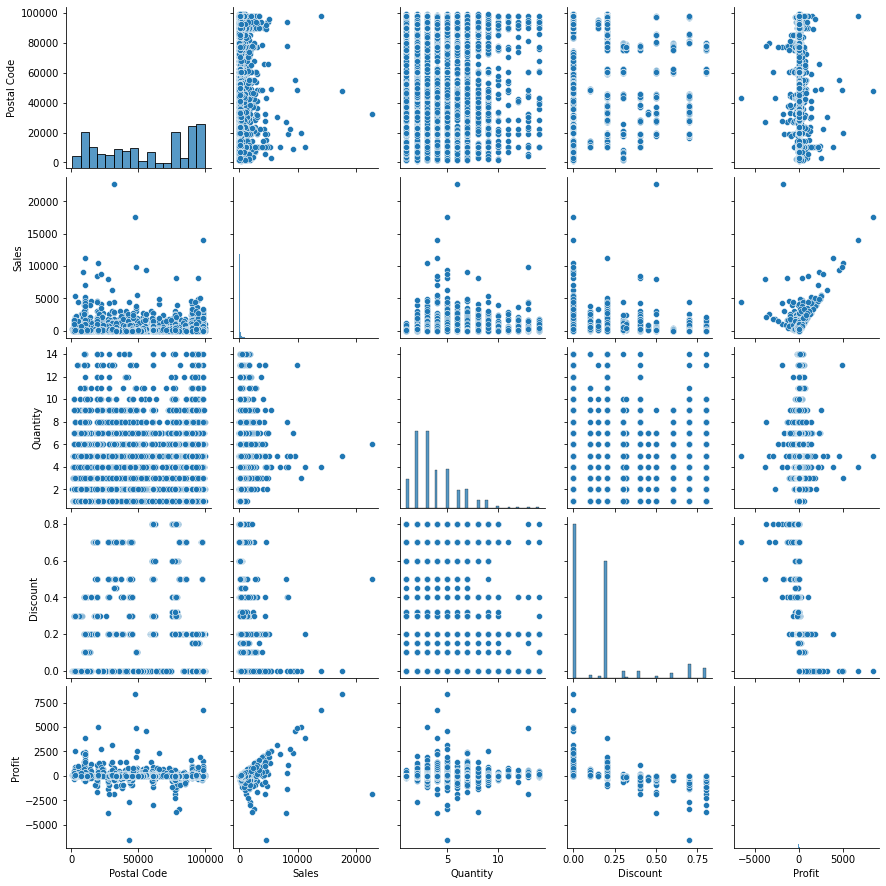

In [12]:
sns.pairplot(df)
plt.show()

#### Sub-Caterogies

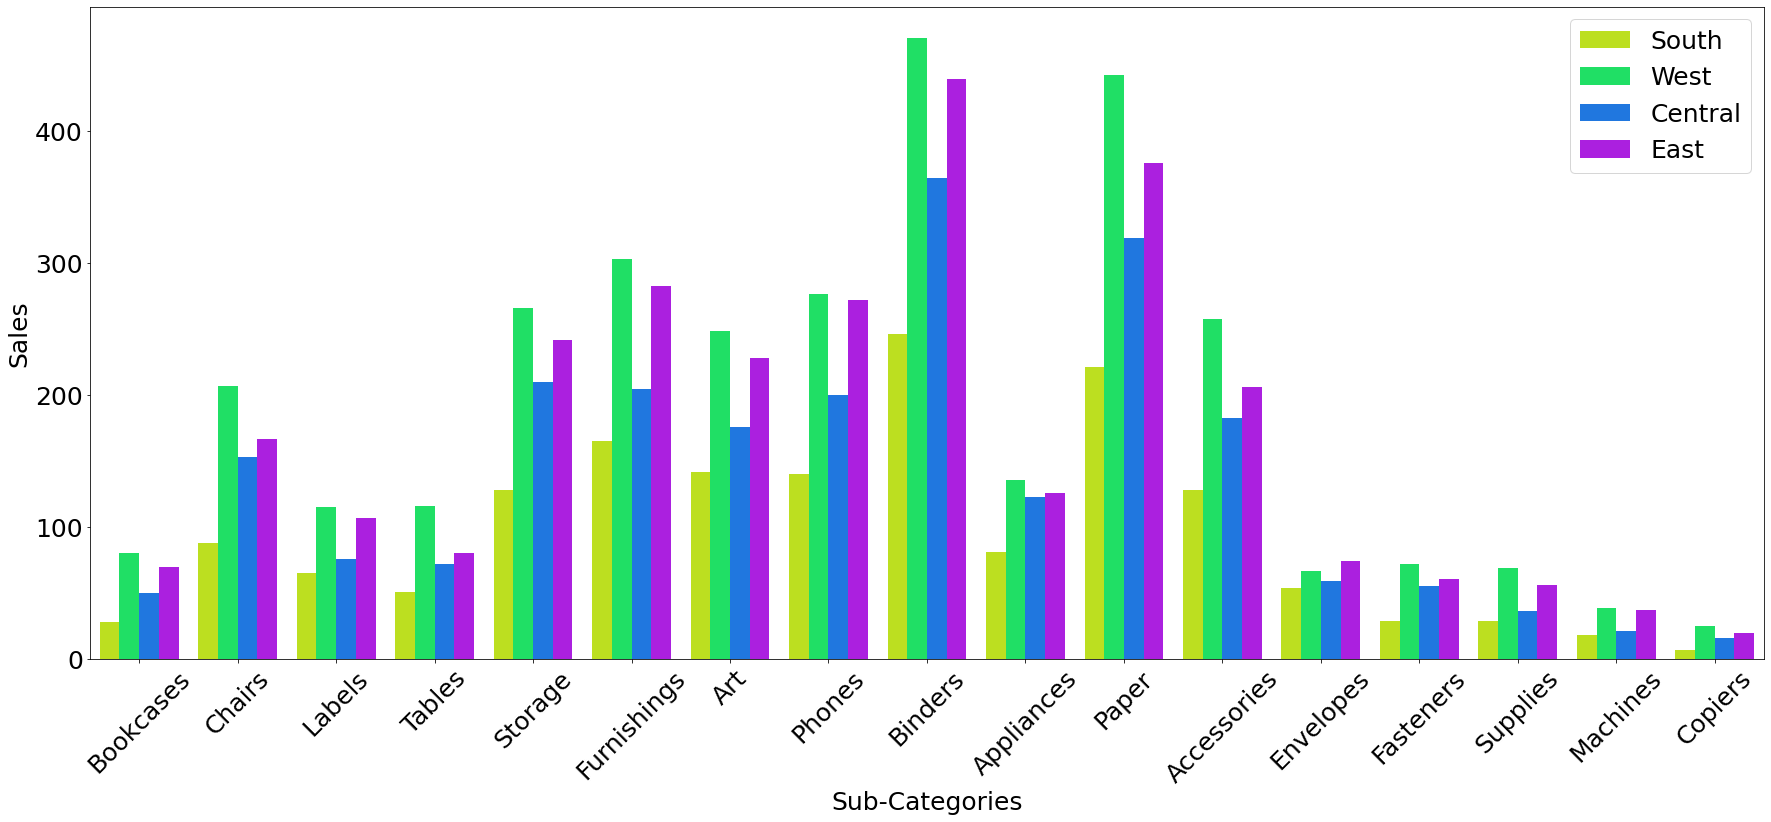

In [13]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = df, palette = 'hsv')
plt.xticks(rotation = 45, fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Sub-Categories', fontsize = 25)
plt.ylabel('Sales', fontsize = 25)
plt.legend(fontsize = 25)
plt.show()

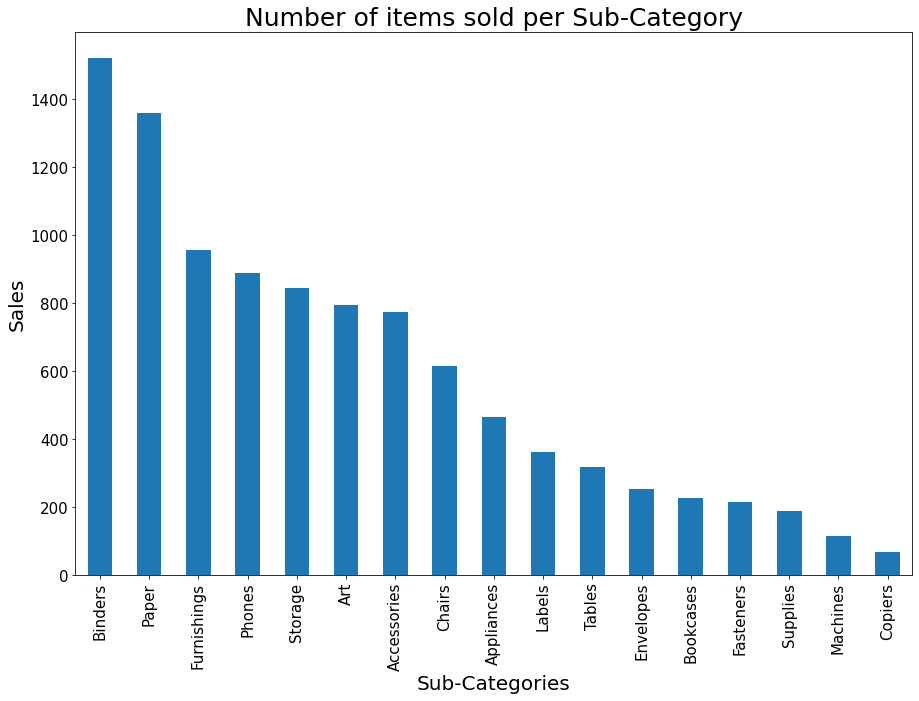

In [14]:
plt.figure(figsize=(15,10))
df['Sub-Category'].value_counts().plot.bar()
plt.title('Number of items sold per Sub-Category', fontsize=25)
plt.xlabel('Sub-Categories', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

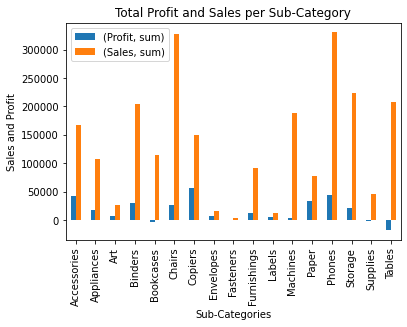

In [15]:
df.groupby('Sub-Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.xlabel('Sub-Categories')
plt.ylabel('Sales and Profit')
plt.legend()
plt.show()

### Profits per Sub-Categories

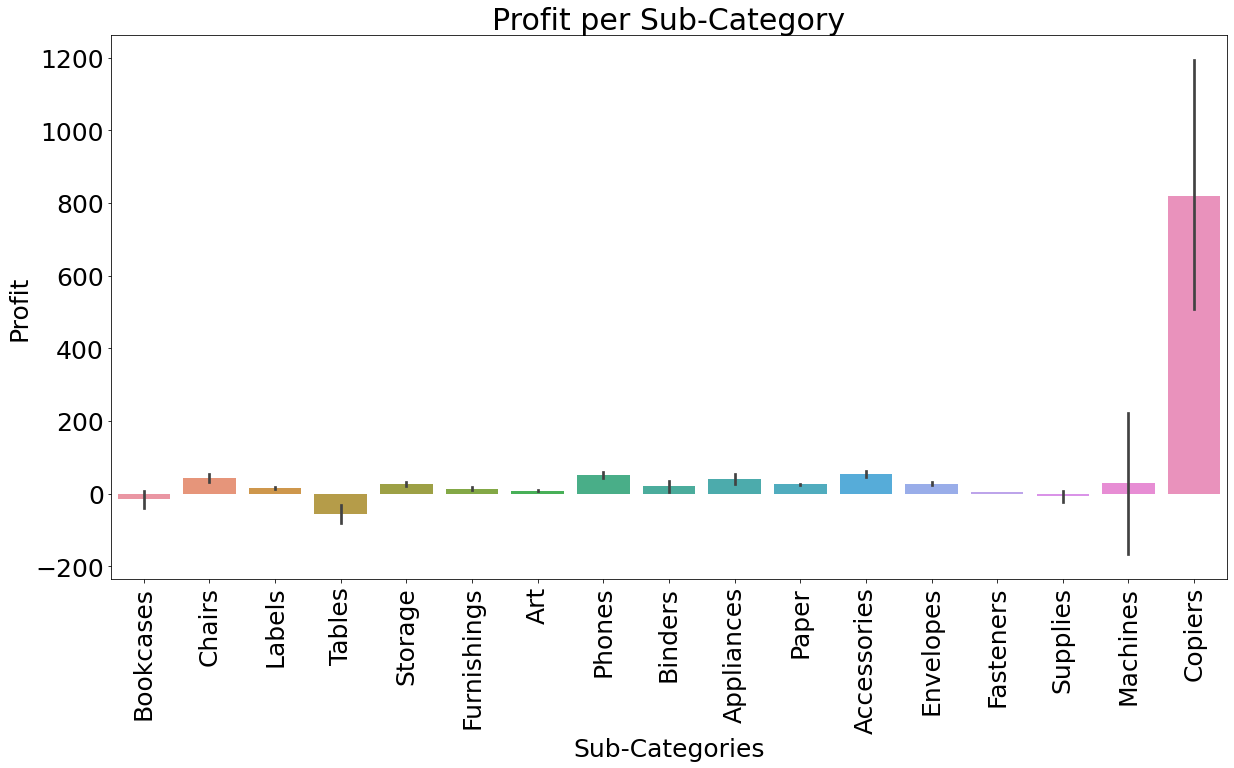

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Sub-Category'], y=df['Profit'], data=df)
plt.title('Profit per Sub-Category', fontsize=30)
plt.xlabel('Sub-Categories', fontsize = 25)
plt.ylabel('Profit', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 25)
plt.yticks(fontsize = 25)
plt.show()

### Insights:
- **Top 3 most profitable sub-categories:** Copiers, Phones and Accessories
- **Top 3 least profitable sub-categories:** Tables, Bookcases and Supplies 